In [43]:
import pandas as pd
#Scraping With GetOldTweets3
#!pip install GetOldTweets3
#import GetOldTweets3 as got
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
nltk.download('wordnet')
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to C:\Users\Abhisha
[nltk_data]     Burande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


### Read Data

In [45]:
data = pd.read_excel("clean_tweet_data_master_adidas.xlsx")


In [46]:
###Length of Dataset
#len(data["clean_tweet_nike_covid.xlsx"])

In [47]:
new_df = data.filter(['date','cleaned_text'], axis=1)


In [48]:
new_df

,date,cleaned_text
0,2020-03-30,unbeliev need fix
1,2020-03-30,packag current enrout address longer use hold ...
2,2020-03-30,love congratul
3,2020-03-30,stand strong team team gesta social distanc wo...
4,2020-03-30,gqboylenz
...,...,...
9946,2019-12-31,good luck tonight hope got shoe situat squar away
9947,2019-12-31,stupid would shoe exact style girl yr old spen...
9948,2019-12-31,best jersey design ever
9949,2019-12-31,becom first brand test footwear innov extrem c...


### Club tweet of each Day

In [49]:
new_df=new_df.groupby('date')['cleaned_text'].agg(lambda x: ' '.join(x.astype(str))).reset_index()

In [50]:
len(new_df)

85

### In below steps the TF and IDF of tweets of each day is calculated

In [51]:
from past.builtins import xrange
nums = [0,len(new_df["cleaned_text"])]

clean_tweet_texts = []
for i in xrange(nums[0],nums[1]):
  clean_tweet_texts.append((new_df.loc[i,"cleaned_text"]))
    #clean_tweet_texts.append(clean_tweet(data['tweet_text'][i]))

In [53]:
tweet_eachDay=[]
for sentecnce in clean_tweet_texts:
    tweet_eachDay.append(str(sentecnce).split())

In [54]:
# calculating DF
DF = {}
for i in range(len(tweet_eachDay)):
    tokens = tweet_eachDay[i]
    #print(tokens)
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
#print(DF)

In [55]:
### finding the frequency of the word 
for i in DF:
    DF[i]= len(DF[i])
#DF

In [56]:
# calculating TF-IDF
import collections
tf_idf = {}
N = len(tweet_eachDay)
tf_idf_allDays =[]
for i in range(N):
    tokens = tweet_eachDay[i]
    # print(tokens)
    counter = collections.Counter(tokens)
    words_count = len(tokens)
    tf_idf_eachday ={}
    for token in np.unique(tokens):
        tf = counter[token]/words_count
        df = DF[token]
        
        idf = np.log(N/df)
        #tf_idf[token,i] = (tf*idf,i)
    
        tf_idf_eachday[token] =tf*idf
    tf_idf_allDays.append(tf_idf_eachday)  

### In below Section the Loghurn negative word doc is imported to do analysis how much negative sentiment tweets carry for given date

In [57]:
negative_word =[]
with open('C:/Users/Abhisha Burande/Desktop/GoHundred/Nike/loughran_negative.txt') as f:
    negative_word = f.read().splitlines()

In [58]:
len(tweet_eachDay)

85

###Negative Sentiment Score is calculated in below section.

In [59]:
sentiment_score=[]
neg_word_number=[]
for i in range(len(tf_idf_allDays)):
    tf_idf_dict = tf_idf_allDays[i]
    word_counter=0
    
    line_sent_score=0
    for word,score in tf_idf_dict.items():
      
      if word.upper() in negative_word:
        word_counter =word_counter+1
        line_sent_score=line_sent_score+score
    #print(line_sent_score)
    sentiment_score.append(line_sent_score)
    neg_word_number.append(word_counter)

In [60]:
new_df["sentiment_score"]=sentiment_score

In [61]:
new_df["neg_word_count"]=neg_word_number

In [62]:
### check the dataset with sentiment score
new_df

,date,cleaned_text,sentiment_score,neg_word_count
0,2019-12-31,ye punish cop year late feel like end start pi...,0.092258,50
1,2020-01-01,board hire mou along pep biggest manag current...,0.111579,54
2,2020-01-02,eye emoji goe pixelflow adida superstar blue r...,0.089113,62
3,2020-01-03,uuuuuuugli still adida guy today kit slc socce...,0.063802,45
4,2020-01-04,got purpl one love grey sweatshirt throwback l...,0.069076,44
...,...,...,...,...
80,2020-03-26,wear year wait alway like lace one get right c...,0.067020,47
81,2020-03-27,never ever buy adida tri make money pandemi sh...,0.069998,49
82,2020-03-28,mockup new personalis wheel new season need co...,0.080760,68
83,2020-03-29,detest design wear everi ounc mean sellout go ...,0.078218,75


### in the following section the sentiment score is divided by total word to normalize the sentiment score.

In [63]:
from past.builtins import xrange
nums = [0,len(new_df["cleaned_text"])]
#nums = [0,3000]
normalized_sentiment_score = []
for i in xrange(nums[0],nums[1]):

  word_count=len(new_df.loc[i,"cleaned_text"].split(" "))
  #print(word_count)
  normalized_score=(new_df.loc[i,"sentiment_score"])/word_count
  normalized_sentiment_score.append(normalized_score)
  #print(normalized_sentiment_score)
     

In [64]:
new_df["normalized_sentiment_score"]=normalized_sentiment_score

In [65]:
new_df.sort_values('normalized_sentiment_score')

,date,cleaned_text,sentiment_score,neg_word_count,normalized_sentiment_score
45,2020-02-18,peopl know ninja said lisa fan dress like ital...,0.048775,42,0.000036
14,2020-01-18,good si beyonc releas ivi park adida sold onli...,0.066945,64,0.000038
8,2020-01-10,need godawg usual hate white look realli sharp...,0.076340,76,0.000038
63,2020-03-07,adida neah favourit pleas sponsor adida theme ...,0.043280,31,0.000041
82,2020-03-28,mockup new personalis wheel new season need co...,0.080760,68,0.000043
...,...,...,...,...,...
73,2020-03-17,botter right move yeezi product launch digit p...,0.139487,63,0.000122
1,2020-01-01,board hire mou along pep biggest manag current...,0.111579,54,0.000122
54,2020-02-27,get big girl fit soccer cleat let goooooo adid...,0.076150,31,0.000124
60,2020-03-04,pleas sponsor manz work everyday ceo bossyourl...,0.129110,51,0.000145


### In the following section Dow dataset for those date range is imported for further analysis.

In [66]:
new_df =new_df.dropna()

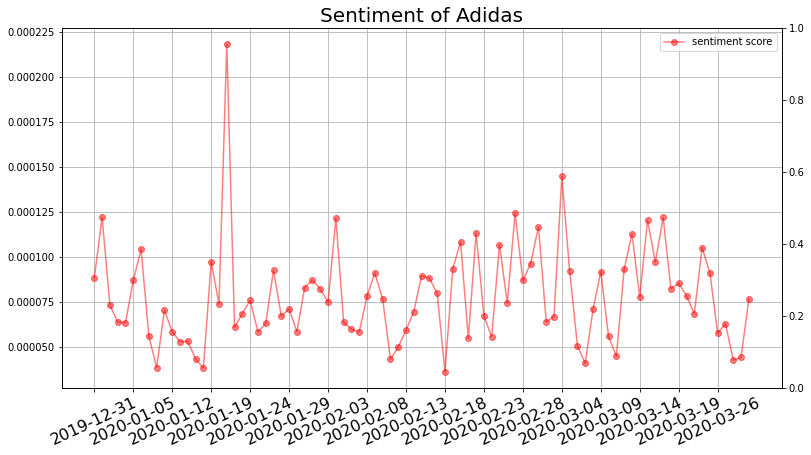

In [67]:
fig = plt.figure(figsize=(10, 5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
# This is the magic that joins the x-axis
ax2 = ax1.twinx()
lns1 = ax1.plot(new_df['normalized_sentiment_score'], color='red', alpha=alpha, marker='o',label='sentiment score')
#lns2 = ax2.plot(new_df['DowPrices'], color='blue', alpha=alpha,marker='o', label='Dow prices')
# Solution for having two legends

ax1.set_xticks(list(range(0, 85, 5)))
ax1.set_xticklabels(new_df.iloc[::5,0], rotation=25,fontsize=16)
leg = lns1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
plt.title('Sentiment of Adidas', fontsize=20)
ax1.grid()        
plt.show()

###Scaling Data

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
### drop the data with high sentiment
new_df_updated =new_df.drop(index=[45])

In [70]:
new_df_updated[['normalized_sentiment_score']] = scaler.fit_transform(new_df_updated[['normalized_sentiment_score']])

In [71]:
new_df_updated.sort_values('normalized_sentiment_score',ascending=False)

,date,cleaned_text,sentiment_score,neg_word_count,normalized_sentiment_score
17,2020-01-21,fabul jacket compani wait giant orang box new ...,0.080046,25,1.000000
60,2020-03-04,pleas sponsor manz work everyday ceo bossyourl...,0.129110,51,0.592023
54,2020-02-27,get big girl fit soccer cleat let goooooo adid...,0.076150,31,0.477938
1,2020-01-01,board hire mou along pep biggest manag current...,0.111579,54,0.465995
73,2020-03-17,botter right move yeezi product launch digit p...,0.139487,63,0.465170
...,...,...,...,...,...
38,2020-02-11,three stripe life joke primo whole model call ...,0.055249,48,0.027364
82,2020-03-28,mockup new personalis wheel new season need co...,0.080760,68,0.024642
63,2020-03-07,adida neah favourit pleas sponsor adida theme ...,0.043280,31,0.014202
8,2020-01-10,need godawg usual hate white look realli sharp...,0.076340,76,0.001123


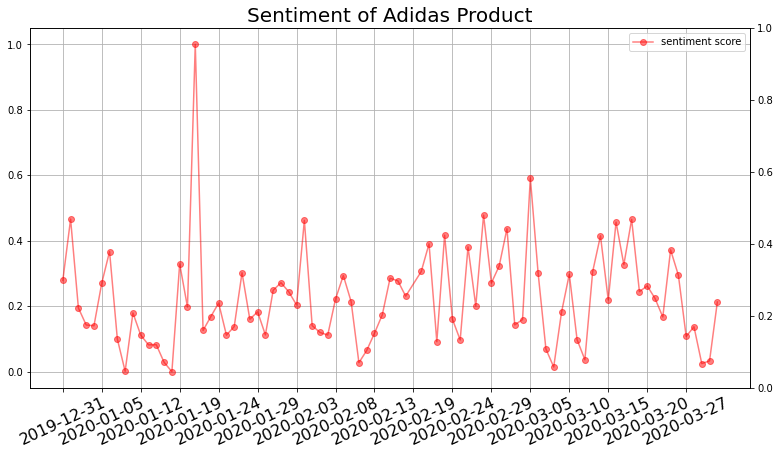

In [72]:
fig = plt.figure(figsize=(10, 5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
# This is the magic that joins the x-axis
ax2 = ax1.twinx()
lns1 = ax1.plot(new_df_updated['normalized_sentiment_score'], color='red', alpha=alpha, marker='o',label='sentiment score')
#lns2 = ax2.plot(new_df_updated['DowPrices'], color='blue', alpha=alpha,marker='o', label='Dow prices')
# Solution for having two legends

ax1.set_xticks(list(range(0, 85, 5)))
ax1.set_xticklabels(new_df_updated.iloc[::5,0], rotation=25,fontsize=16)
leg = lns1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
plt.title('Sentiment of Adidas Product', fontsize=20)
ax1.grid()        
plt.show()

In [37]:
import fbprophet
new_df_updated = new_df_updated.rename(columns={'date': 'ds', 'normalized_sentiment_score': 'y'})
adidas_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
adidas_prophet.fit(new_df_updated)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# Make a future dataframe for 2 years
adidas_forecast = adidas_prophet.make_future_dataframe(periods=60, freq='D')
# Make predictions
adidas_forecast = adidas_prophet.predict(adidas_forecast)

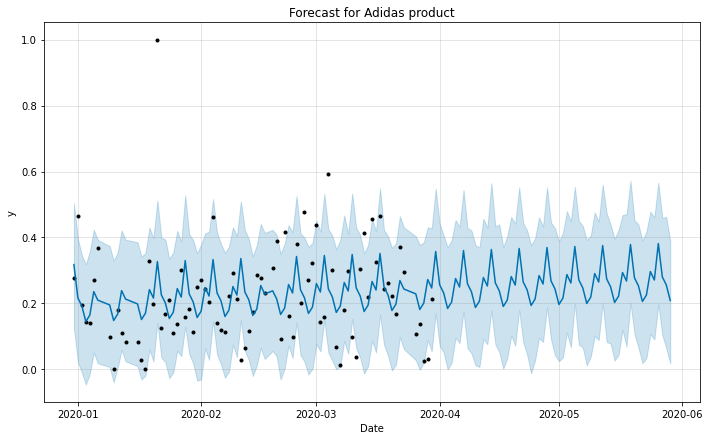

In [39]:
adidas_prophet.plot(adidas_forecast, xlabel = 'Date')
plt.title('Forecast for Adidas product');

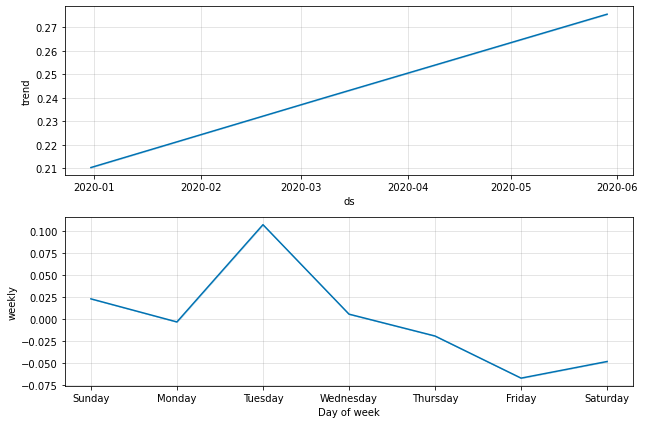

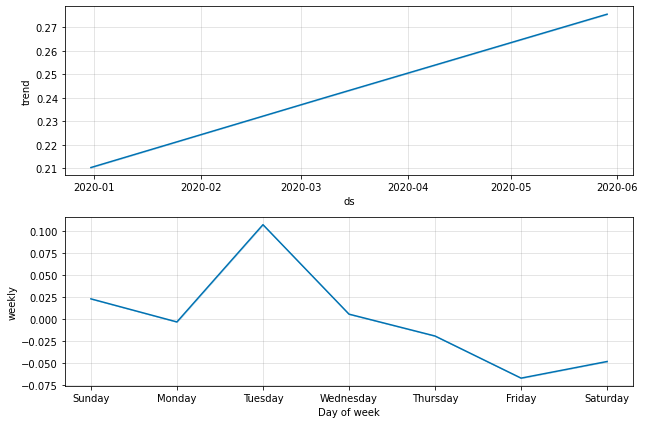

In [40]:
adidas_prophet.plot_components(nike_forecast)
